In [ ]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
torch.manual_seed(473)
device=""
if torch.cuda.is_available():
    device=torch.device("cuda")
else:
    device=torch.device("cpu")
device

device(type='cpu')

In [ ]:
def dataextract(n,tset):
  itt=iter(tset)
  DATA=[]
  for i in range(len(tset)):
    K=next(itt)
    if K[1] in n:
      DATA.append((K[0],K[1]))
  return DATA

def plotter(model,dataloader,n):
  iterr=iter(dataloader)
  for i in range(n**2):
    img,lbl=next(iterr)
    with torch.no_grad():
      out=model(img[i].view(1,-1))
    pred=torch.exp(out).numpy().argmax(axis=1)
    ax=plt.subplot(n,n,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i].reshape(3,img[0][0].shape[0],img[0][0].shape[0]),cmap='gray')
    tit='C: '+str(lbl.numpy()[i])+"; P: "+str(pred)
    plt.title(tit)

def ploter(model,dataloader,n):
  iterr=iter(dataloader)
  for i in range(n**2):
    img,lbl=next(iterr)
    img=torchvision.utils.make_grid(img)
    img=img / 2 + 0.5
    plt.imshow(np.transpose(img.numpy(),(1,2,0)))
    plt.show()
    p=''
    for j in range(len(lbl)):
      p=p+str(classes[lbl[j]])+"; "
    print(str(i)+": p= "+str(p))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
#imshow(torchvision.utils.make_grid(images))
#print(labels)

In [ ]:
class Customdata(torch.utils.data.Dataset):
  def __init__(self,n,tset,transform=None):
    self.dat=dataextract(n,tset)
    self.transform=transform
  def __len__(self):
    return len(self.dat)
  def __getitem__(self,index):
    #if self.transform:
    #  img=self.transform(self.dat[index][0])
    return (self.dat[index][0],self.dat[index][1])

class CIFAR(nn.Module):
  def __init__(self,inputsize,hiddenlsize):
    super().__init__()
    self.model=nn.Sequential(nn.Linear(inputsize,hiddenlsize[0]),nn.ReLU(),
                             nn.Linear(hiddenlsize[0],hiddenlsize[1]),nn.ReLU(),
                             nn.Linear(hiddenlsize[1],10),nn.LogSoftmax(dim=1))
  def forward(self,x):
    output=self.model(x)
    return output

  def trainer(self,dataloader):
    epochs=5
    lr=0.003
    momentum=0.9
    lossfunction=nn.NLLLoss()#for classifying problems with 'c' number of classes
    optimizer=torch.optim.SGD(self.model.parameters(),lr=lr,momentum=momentum)
    for i in range(epochs):
      runningloss=0
      for images,labels in dataloader:
        images=images.view(images.shape[0],-1)#tensor from [batchsize,1,28,28] to [batchsize,28*28] ==> flatten images

        optimizer.zero_grad()
        out=self.model(images)#applies model to each image in batch and return label list for the batch
        loss=lossfunction(out,labels)#each image in batch==> {out[i][0],out[i][1]...out[i][c] }==> should have class given in labels[i] i.e out[i][labels[i]] should be 1
        loss.backward()
        optimizer.step()

        runningloss += loss.item()
      print("epoch: "+str(i)+" : loss= "+str(runningloss))

  def tester(self,dataloader):
    correct,all=0,0
    for images,labels in dataloader:
      for i in range(len(labels)):
        img=images[i].view(1,-1)
        with torch.no_grad():
          outs=self.model(img)
        pred=torch.exp(outs).numpy().argmax(axis=1)
        if pred== labels.numpy()[i]:
          correct +=1
        all +=1
    print("All= "+str(all)+"; correct= "+str(correct)+"; Accuracy= "+str(correct/all))

  def unlearn(self,classtoforget):
    return None


In [ ]:
batch_size = 4
#train_loader=torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset=torchvision.datasets.CIFAR10(root='.', train=True,
                                        download=True, transform=transform)
testset=torchvision.datasets.CIFAR10(root='.', train=False,
                                        download=True, transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 68865616.68it/s]


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
images,labels=next(iter(trainloader))
imgs=images.view(images.shape[0],-1)
model=CIFAR(imgs.shape[1],[128,64])

In [ ]:
#imgs.shape,labels.shape
img=images.view(images.shape[0],-1)


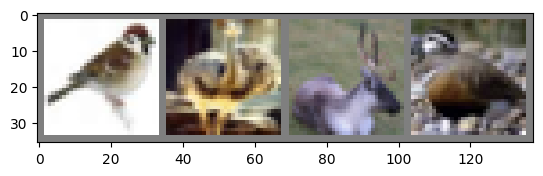

tensor([2, 2, 4, 2])


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))
print(labels)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
model.trainer(trainloader)

epoch: 0 : loss= 21874.75149834156
epoch: 1 : loss= 20386.433456733823
epoch: 2 : loss= 19841.889647357166
epoch: 3 : loss= 19254.570613425225
epoch: 4 : loss= 18952.365986555815


In [ ]:
model.tester(testloader)

All= 10000; correct= 1011; Accuracy= 0.1011


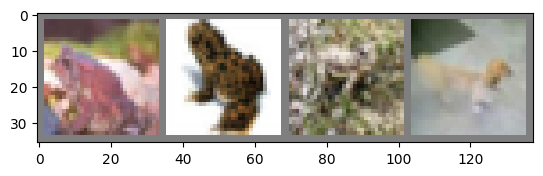

0: p= frog; frog; frog; dog; 


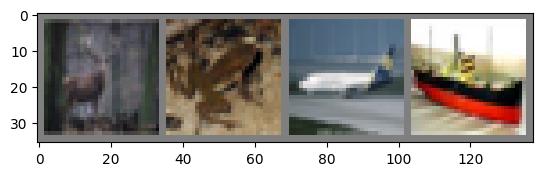

1: p= deer; frog; plane; ship; 


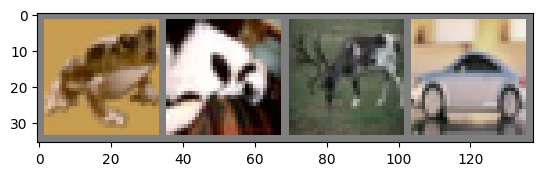

2: p= frog; cat; deer; car; 


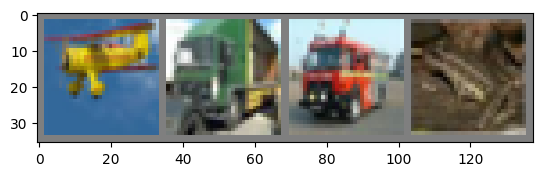

3: p= plane; truck; truck; frog; 


In [ ]:
ploter(model,testloader,2)

In [ ]:
a,b=next(iter(testloader))
a.shape,b.shape
#a[0].shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [ ]:
a2=a.view(a.shape[0],-1)[0]
a2.shape

torch.Size([3072])

In [ ]:
a3=a2.view(1,-1)
model(a)

RuntimeError: ignored

In [ ]:
images,labels=next(iter(trainloader))
imgs=imgs.view(imgs.shape[0],-1)
cmodel=MNIST(imgs.shape[1],[128,64])

In [ ]:
cmodel.tester(testloader)

NameError: ignored

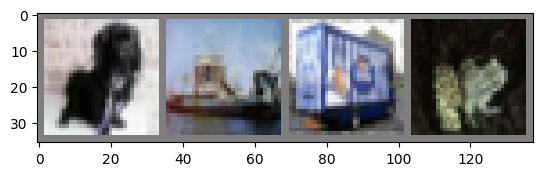

0: p= dog; ship; truck; frog; 


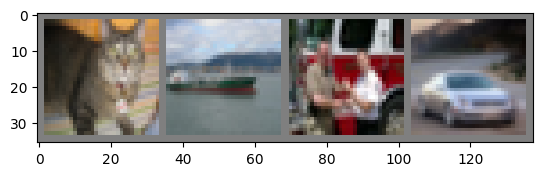

1: p= cat; ship; truck; car; 


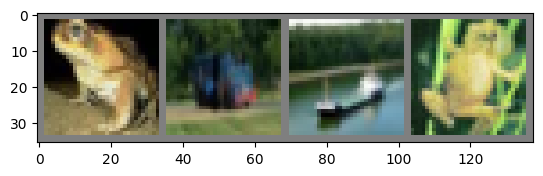

2: p= frog; truck; ship; frog; 


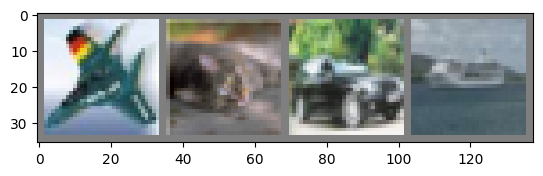

3: p= plane; cat; car; ship; 


In [ ]:
ploter(cmodel,testloader,2)

In [ ]:
cmodel.trainer(trainloader)
cmodel.tester(testloader)


epoch: 0 : loss= 21868.707007065415
epoch: 1 : loss= 20401.086619332433
epoch: 2 : loss= 19870.628418952227
epoch: 3 : loss= 19314.610140871257
epoch: 4 : loss= 18940.349718179554
All= 10000; correct= 4444; Accuracy= 0.4444


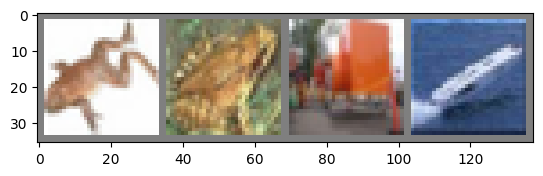

0: p= frog; frog; truck; ship; 


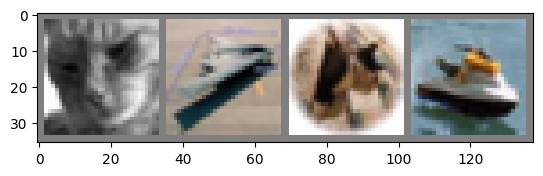

1: p= cat; plane; cat; ship; 


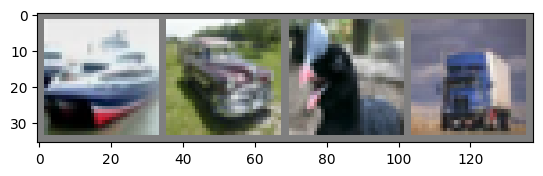

2: p= ship; car; bird; truck; 


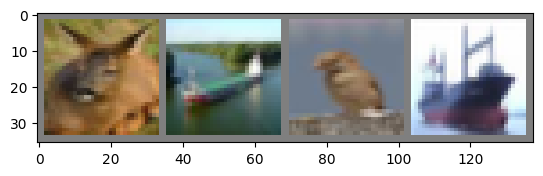

3: p= deer; ship; bird; ship; 


In [ ]:
ploter(cmodel,testloader,2)